In [1]:

import jieba
import numpy as np
from jieba import posseg
from collections import defaultdict
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei']     #设置为SimHei字体，确保中文输出  
%matplotlib inline
def cut(string):
    return list(jieba.cut(string))   #jieba.cut 获取字符


def idf(word):
    eps = 1e-6   #防止error
    
    return 1 / (np.log10(sum(1 for s in sentences if word in s)) + eps)    #输出各个词的idf  df = 检查词出现在多少不同句子中   idf，是一个log10公式


def tf(word, sentence_cut):
    return sentence_cut.count(word)           #输出各个词的tf，词频数 某个词在一个句子出现词数


def tfidf(word, sentence):
    return tf(word, sentence) * idf(word)      #相乘


def get_tfidf_from_sentence(sentence_cut):
    ## you code here
    '''
    return : a dictionary
    '''
    
    tf_idf_words = dict()
    
    for c in set(sentence_cut):
        tf_idf_words[c] = tfidf(c, sentence_cut)    #句子中每个单词的tfidf值
        
    return tf_idf_words


def get_top_tfidf(sentence_cut, ratio=0.25):
    """
    return : [(word1, tfidf_value), (word2, tfidf_value)]
    """
    tfidf_value = get_tfidf_from_sentence(sentence_cut)
    
    top_ratio = ratio                 #占比最高的百分之多少
    
    return sorted(tfidf_value.items(), key=lambda x: x[1], reverse=True)[:int(len(tfidf_value)*top_ratio)]


def is_name(cut_word):          #判断是否为名字
    w, _type = list(posseg.cut(cut_word))[0]         
       
    if _type == 'nr': return True
    
    return False


# def get_names_from_sentence(sentence: str):
#     names = []
    
#     for w_t in posseg.cut(cut_word):
#         w, t = tuple(w_t)
        
#         if t ++ 
#     return [w for w in cut_sentence if is_name(w)]


# we do some refractor
# def get_name_correlate(sentence: str):
    
#     name_correlate = defaultdict(lambda : defaultdict(int))
    
#     names = []
    
#     for w_t in posseg.cut(sentence):
#         w, t = tuple(w_t)
        
#         if t == 'nr': names.append(w)
            
#     for n in names:
#         for w in names:
#             if n == w: continue
                
#             name_correlate[n][w] += 1 
    
#     return name_correlate
# def get_names_from_sentence(cut_sentence):
#     return [w for w in cut_sentence if is_name(w)]   #

# def get_name_correlate(sentence_cut):
#     name_correlate = defaultdict(lambda : defaultdict(int))     #定义格式   'name_key':{ 'name': int}
# #     for sentence_cut in sentences_cut:          #输入是多个句子的切词后的list，对每一句进行处理
#     names_in_sentence = get_names_from_sentence(sentence_cut)      #获取每句中的人名，生成一个人名list
#     for name_key in names_in_sentence:          #搜索名字作为name_key（第一层的dict），并搜索同句子中所有名字
#         for name_in_same_sentence in names_in_sentence:                 
#             if name_in_same_sentence == name_key:         #若是key，不计数
#                 pass
#             else:                               #不为key，则加1
#                 name_correlate[name_key][name_in_same_sentence] += 1
#     return name_correlate

def get_name_correlate(sentence):
    name_correlate = defaultdict(lambda : defaultdict(int))     #定义格式   'name_key':{ 'name': int}
    names = []
    for w_t in posseg.cut(sentence):    #切割句子获取名字
        w, t = tuple(w_t)
        if t == 'nr': names.append(w)
    for name_key in names:          #搜索名字作为name_key（第一层的dict），并搜索同句子中所有名字
        for name_in_same_sentence in names:                 
            if name_in_same_sentence == name_key:         #若是key，不计数
                pass
            else:                               #不为key，则加1
                name_correlate[name_key][name_in_same_sentence] += 1
    return name_correlate

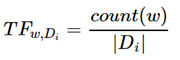

其中，count(w)为关键词w的出现次数，|Di|为文档Di中所有词的数量。
即词频占比

逆文档频率（Inverse Document Frequency, IDF）反映关键词的普遍程度——当一个词越普遍（即有大量文档包含这个词）时，其IDF值越低；反之，则IDF值越高。IDF定义如下：   如果句句都有，则为log1 = 0，反之，越少出现越高

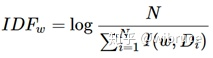

其中，N为所有的文档总数，I(w,Di)表示文档Di是否包含关键词，若包含则为1，若不包含则为0。若词w在所有文档中均未出现，则IDF公式中的分母为0；因此需要对IDF做平滑（smooth）：

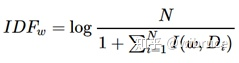

关键词w在文档Di的TF-IDF值

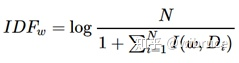

In [2]:
content = open('./article_9k.txt',encoding='utf-8')
CHARACTERS = content.read()

In [3]:
sentences = CHARACTERS.split('\n')
all_sentences_with_cut_tokens = []

In [4]:
all_sentences_with_cut_tokens = [cut(s) for s in sentences]

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\86186\AppData\Local\Temp\jieba.cache
Loading model cost 0.660 seconds.
Prefix dict has been built successfully.


##practice用tf-idf表示单词的重要性

In [5]:
sample_news = get_top_tfidf(all_sentences_with_cut_tokens[99])

In [6]:
sample_news

[('任远明', 1000000.0),
 ('服务卡', 3.321922577293393),
 ('邮储', 2.880754937115057),
 ('工会', 2.1986151062485737),
 ('会籍', 2.0958988814880564),
 ('四川省', 1.877751728962409),
 ('正阳', 1.7954218232340378),
 ('总工会', 1.5276591648884605),
 ('普惠性', 1.4306755346564182),
 ('邮政', 1.3404543612178637),
 ('分行', 1.209673545005994),
 ('会员', 1.1436194292939366),
 ('服务', 1.0351708152199),
 ('省', 0.9591856844299416),
 ('摄据', 0.9266275493897159),
 ('银行', 0.857793461373016),
 ('合作', 0.7672664304498398),
 ('公司', 0.7587249254744466),
 ('党组', 0.7339192276116211),
 ('签约', 0.7227635066571622)]

In [7]:
from wordcloud import WordCloud

In [8]:
wc = WordCloud()

In [9]:
news_dict = {}

In [10]:
for i in range(len(sample_news)):
    news_dict[sample_news[i][0]] = sample_news[i][1]
frequency_dict = {w: tfidf for w, tfidf in sample_news}    #一行版本

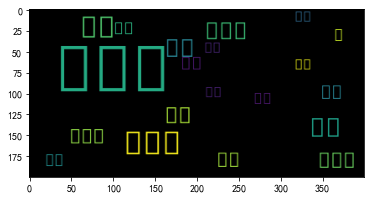

In [11]:
wc.generate_from_frequencies(frequency_dict)
plt.imshow(wc)

In [12]:
wc = WordCloud(font_path='./heiti.ttf')   #wordcloud 定义的时候加载字体

In [13]:
def generate_wordcloud(tfidf_list):
    word_dict = {w:tfidf for w,tfidf in tfidf_list}   #注意，此处用的是dictionary，要冒号+{}
    wc.generate_from_frequencies(word_dict)
    plt.imshow(wc)

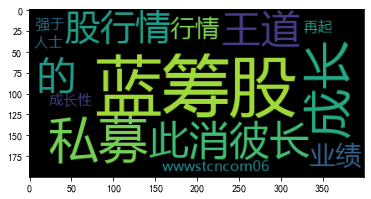

In [14]:
generate_wordcloud(get_top_tfidf(all_sentences_with_cut_tokens[10]))

e:\python\python37\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in log10
  app.launch_new_instance()


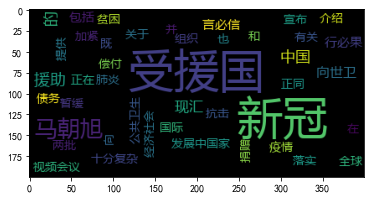

In [15]:
input_str = str('6月7日，国务院新闻办举行新闻发布会，介绍《抗击新冠肺炎疫情的中国行动》白皮书有关情况并答记者问。外交部副部长马朝旭表示，当前全球疫情形势依然十分复杂严峻，面对二战结束以来最严重的国际突发公共卫生事件，人类向何处去这是国际社会共同关心的问题。“中国一向是言必信、行必果，说到的一定做到。”马朝旭表示，习近平主席在第73届世界卫生大会视频会议开幕式讲话中宣布的举措，都在积极落实中并不断取得新进展。\
                他介绍，关于中国将提供20亿美元援助的承诺，既包括提供抗疫物资援助，也包括支持有关国家疫后经济社会恢复发展，既包括双边援助，也包括多边捐赠。中国正同有需要受援国通过平等协商确定援助项目，帮助发展中国家提升公共卫生水平、改善民生、减少贫困、促进经济社会复苏。同时，中国向世卫组织分两批提供了5000万美元现汇援助，并向全球疫苗联盟等国际组织捐赠等。\
                关于联合国人道主义应急仓库和枢纽在中国的建设，正在商谈和加紧筹建之中。中国还积极参与并落实20国集团暂缓最贫困国家债务偿付的倡议，已经宣布向77个发展中国家和地区暂停债务偿还。30个中非对口医院合作机制也正在加紧建立。')
generate_wordcloud(get_top_tfidf(cut(input_str)))    #换行用的是\

画图啦！！！！

In [16]:
import networkx as nx    #做图算法常用的库

In [17]:
city_graph = {
    '北京': ['天津', '河北'],
    '天津': ['山西'],
    '山西': ['陕西']
}

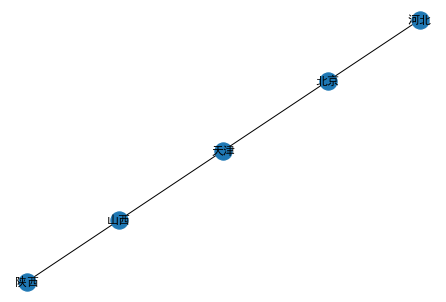

In [18]:
mini_graph = nx.Graph(city_graph)
nx.draw(mini_graph, with_labels=True)

In [19]:
corelate_sample = get_name_correlate(sentences[1000])

In [20]:
simple_graph = {}
     
for k,d in corelate_sample.items():
    simple_graph[k] = [key for key in d.keys()]    

In [21]:
simple_graph

{'潘玮柏': ['大张伟', '戚薇', '乔杉', '刘维', '张力', '潘氏', '高潮'],
 '大张伟': ['潘玮柏', '戚薇', '乔杉', '刘维', '张力', '潘氏', '高潮'],
 '戚薇': ['潘玮柏', '大张伟', '乔杉', '刘维', '张力', '潘氏', '高潮'],
 '乔杉': ['潘玮柏', '大张伟', '戚薇', '刘维', '张力', '潘氏', '高潮'],
 '刘维': ['潘玮柏', '大张伟', '戚薇', '乔杉', '张力', '潘氏', '高潮'],
 '张力': ['潘玮柏', '大张伟', '戚薇', '乔杉', '刘维', '潘氏', '高潮'],
 '潘氏': ['潘玮柏', '大张伟', '戚薇', '乔杉', '刘维', '张力', '高潮'],
 '高潮': ['潘玮柏', '大张伟', '戚薇', '乔杉', '刘维', '张力', '潘氏']}

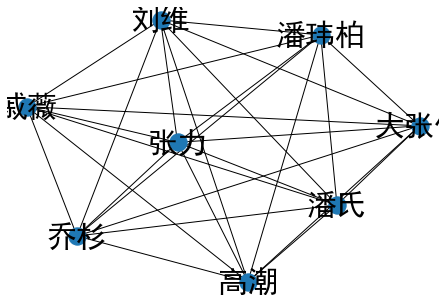

In [22]:
sample_graph = nx.Graph(simple_graph)
nx.draw(sample_graph, with_labels=True,font_size = 30)

In [23]:
graph_with_weight_vis = nx.Graph()

for k,d in corelate_sample.items():
#     for name,value in d.items():
        graph_with_weight_vis.add_weighted_edges_from([(k,name,value) for name,value in d.items()])

In [24]:
graph_with_weight_vis = nx.Graph()
#原版
for k, d in corelate_sample.items():
    for name, value in d.items():
        print(k, name, value)
        graph_with_weight_vis.add_weighted_edges_from([(k, name, value)])

潘玮柏 大张伟 4
潘玮柏 戚薇 4
潘玮柏 乔杉 4
潘玮柏 刘维 4
潘玮柏 张力 4
潘玮柏 潘氏 4
潘玮柏 高潮 4
大张伟 潘玮柏 4
大张伟 戚薇 1
大张伟 乔杉 1
大张伟 刘维 1
大张伟 张力 1
大张伟 潘氏 1
大张伟 高潮 1
戚薇 潘玮柏 4
戚薇 大张伟 1
戚薇 乔杉 1
戚薇 刘维 1
戚薇 张力 1
戚薇 潘氏 1
戚薇 高潮 1
乔杉 潘玮柏 4
乔杉 大张伟 1
乔杉 戚薇 1
乔杉 刘维 1
乔杉 张力 1
乔杉 潘氏 1
乔杉 高潮 1
刘维 潘玮柏 4
刘维 大张伟 1
刘维 戚薇 1
刘维 乔杉 1
刘维 张力 1
刘维 潘氏 1
刘维 高潮 1
张力 潘玮柏 4
张力 大张伟 1
张力 戚薇 1
张力 乔杉 1
张力 刘维 1
张力 潘氏 1
张力 高潮 1
潘氏 潘玮柏 4
潘氏 大张伟 1
潘氏 戚薇 1
潘氏 乔杉 1
潘氏 刘维 1
潘氏 张力 1
潘氏 高潮 1
高潮 潘玮柏 4
高潮 大张伟 1
高潮 戚薇 1
高潮 乔杉 1
高潮 刘维 1
高潮 张力 1
高潮 潘氏 1


In [25]:
pos = nx.spectral_layout(graph_with_weight_vis)

In [26]:
edges = []

In [27]:
for k,d in corelate_sample.items():
    for name,value in d.items():
        edges.append((k,name,value))
edges

[('潘玮柏', '大张伟', 4),
 ('潘玮柏', '戚薇', 4),
 ('潘玮柏', '乔杉', 4),
 ('潘玮柏', '刘维', 4),
 ('潘玮柏', '张力', 4),
 ('潘玮柏', '潘氏', 4),
 ('潘玮柏', '高潮', 4),
 ('大张伟', '潘玮柏', 4),
 ('大张伟', '戚薇', 1),
 ('大张伟', '乔杉', 1),
 ('大张伟', '刘维', 1),
 ('大张伟', '张力', 1),
 ('大张伟', '潘氏', 1),
 ('大张伟', '高潮', 1),
 ('戚薇', '潘玮柏', 4),
 ('戚薇', '大张伟', 1),
 ('戚薇', '乔杉', 1),
 ('戚薇', '刘维', 1),
 ('戚薇', '张力', 1),
 ('戚薇', '潘氏', 1),
 ('戚薇', '高潮', 1),
 ('乔杉', '潘玮柏', 4),
 ('乔杉', '大张伟', 1),
 ('乔杉', '戚薇', 1),
 ('乔杉', '刘维', 1),
 ('乔杉', '张力', 1),
 ('乔杉', '潘氏', 1),
 ('乔杉', '高潮', 1),
 ('刘维', '潘玮柏', 4),
 ('刘维', '大张伟', 1),
 ('刘维', '戚薇', 1),
 ('刘维', '乔杉', 1),
 ('刘维', '张力', 1),
 ('刘维', '潘氏', 1),
 ('刘维', '高潮', 1),
 ('张力', '潘玮柏', 4),
 ('张力', '大张伟', 1),
 ('张力', '戚薇', 1),
 ('张力', '乔杉', 1),
 ('张力', '刘维', 1),
 ('张力', '潘氏', 1),
 ('张力', '高潮', 1),
 ('潘氏', '潘玮柏', 4),
 ('潘氏', '大张伟', 1),
 ('潘氏', '戚薇', 1),
 ('潘氏', '乔杉', 1),
 ('潘氏', '刘维', 1),
 ('潘氏', '张力', 1),
 ('潘氏', '高潮', 1),
 ('高潮', '潘玮柏', 4),
 ('高潮', '大张伟', 1),
 ('高潮', '戚薇', 1),
 ('高潮', '乔杉', 1),
 ('高潮', '刘维', 1),


In [28]:
all_weight = set(w for n1,n2,w in edges)

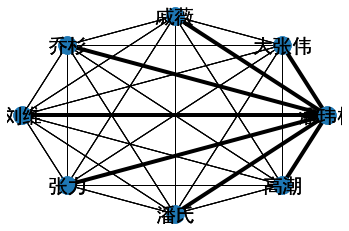

In [29]:
pos=nx.circular_layout(graph_with_weight_vis) 

for weight in all_weight:
    weighted_edges = [(node1,node2) for (node1,node2,edge_attr) in graph_with_weight_vis.edges(data=True) if edge_attr['weight']==weight]   #查出对应权重的边有哪些
    width = weight                       #设定线宽
    nx.draw_networkx_edges(graph_with_weight_vis,pos,edgelist=weighted_edges,width=width)    #画出有1的所有边，画出4的所有边
    nx.draw(graph_with_weight_vis, pos=pos, with_labels=True, font_size=20)             #生成图

In [30]:
key_word = '奥巴马'
hit_ids = []
for i,sentence in enumerate(sentences[:5000]):
    if key_word in sentence:
        hit_ids.append(i)

In [31]:
hit_ids

[367,
 633,
 828,
 1670,
 1691,
 1916,
 1935,
 2062,
 2076,
 2079,
 2336,
 2347,
 2354,
 2524,
 2771,
 2797,
 2818,
 2862,
 3044,
 3502,
 3520,
 3530,
 3578,
 3640,
 4188,
 4239,
 4244,
 4422,
 4556,
 4680,
 4814,
 4937]

In [32]:
total_dictionary = defaultdict(list)
for s_id in hit_ids:
    for key,relation in get_name_correlate(sentences[s_id]).items():
        total_dictionary[key] +=[name for name in relation]

In [33]:
total_list = []
for s_id in hit_ids:
    get_name_correlate(sentences[s_id])
    for k,d in get_name_correlate(sentences[s_id]).items():
        for name,value in d.items():
            total_list.append((k,name,value))
        

In [34]:
obama_graph = nx.Graph(total_dictionary)

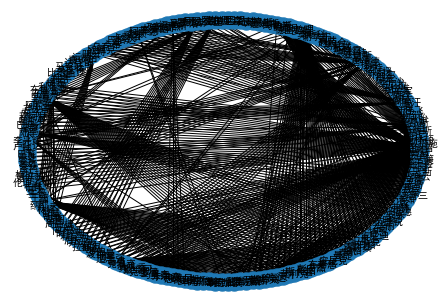

In [35]:
pos = nx.circular_layout(obama_graph)
nx.draw(obama_graph, pos=pos, with_labels=True, font_size=10)

In [45]:
g = nx.karate_club_graph() # a dataset from its install package

In [36]:
len(CHARACTERS)

33425826

In [38]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [39]:
import random

In [40]:
points_num = 100

random_x = [random.randint(-100, 100) for _ in range(points_num)]
random_y = [random.randint(-100, 100) for _ in range(points_num)]

In [41]:
random_poinsts = [(x, y) for x, y in zip(random_x, random_y)]

e:\python\python37\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
e:\python\python37\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


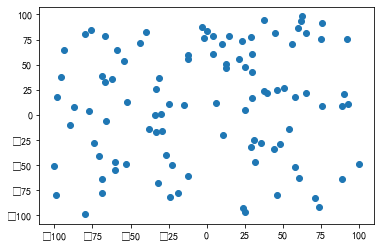

In [42]:
plt.scatter(random_x, random_y)

In [43]:
def dis(p1, p2):
    return np.sqrt((p1[0] - p2[0]) ** 2 + (p1[1] - p2[1]) ** 2)

In [44]:
import numpy as np

一次迭代的KMeans

In [ ]:
kernel_colors = ['red', 'green', 'yellow', 'blue', 'purple']

new_kernels = []      

groups = [[] for _ in range(K)]    #初始化K个组别 


for p in random_poinsts:
    distances = [dis(p, k) for k in previous_kernels]   #计算每个点和每个类的cluster的举例
    
    min_index = np.argmin(distances)           #确定哪个类为最小距离，归入该类（index）
    
    groups[min_index].append(p)           #将点分组进对应的group
    
for i, p in enumerate(previous_kernels):                 #画出原来的每个类的中心店
    plt.scatter([p[0]], [p[1]], color=kernel_colors[i], s=100)
#plt.scatter([previous_kernels[1][0]], [previous_kernels[1][1]], color=kernel_colors[1], s=100)
#plt.scatter([previous_kernels[2][0]], [previous_kernels[2][1]], color=kernel_colors[2], s=100)


for i, g in enumerate(groups):               #对每个组别的点进行遍历
    g_x = [_x for _x, _y in g]
    g_y = [_y for _x, _y in g]
    
    n_k_x, n_k_y = np.mean(g_x), np.mean(g_y)    #对每个组别求新的中心点
    new_kernels.append((n_k_x, n_k_y))          #新点！
    
    print(kernel_colors[i])
    plt.scatter(g_x, g_y, color=kernel_colors[i])
   # plt.scatter([n_k_x], [n_k_y], color=kernel_colors[i], alpha=0.5, s=200)
    
    print('根据新的Group获得的kernal和之前的kernel的距离是: {}'.format(dis((n_k_x, n_k_y), 
                                                            previous_kernels[i])))

#plt.scatter(random_x, random_y, s=10)

previous_kernels = new_kernels